In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_transaction_df = pd.read_csv('./ieee-fraud-detection/train_transaction.csv')
train_identity_df = pd.read_csv('./ieee-fraud-detection/train_identity.csv')
train_df = train_transaction_df.merge(train_identity_df, on='TransactionID', how='left')

print(f"{train_transaction_df.shape = }, \n{train_identity_df.shape = }, \n{train_df.shape = }")
train_df

train_transaction_df.shape = (590540, 394), 
train_identity_df.shape = (144233, 41), 
train_df.shape = (590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd

# Define a mapping of common browsers and keywords
browser_mapping = {
    'Chrome': ['chrome', 'chromium', 'google search application'],
    'Safari': ['safari', 'mobile safari', 'safari generic', 'mobile safari uiwebview'],
    'Firefox': ['firefox', 'icedragon', 'cyberfox', 'waterfox', 'seamonkey', 'palemoon'],
    'Edge': ['edge', 'microsoft edge', ],
    'IE': ['ie', 'internet explorer'],
    'Samsung Browser': ['samsung browser', 'Samsung'],
    'Opera': ['opera'],
    'facebook': ['facebook'],
    'windows': ['microsoft', 'microsoft/windows'],
    'Android Browser': ['android', 'android browser', 'android webview'],
    'Other': ['maxthon', 'line', 'comodo', 'aol', 'Lanix', 'M4Tel', 'Inco', 'BLU', 'ZTE', 'Cherry', 'iron', 'silk', 'puffin' ]
}

# Function to find category based on mapping
def categorize_browser(value):
    # Convert value to lowercase for case-insensitive matching
    value_lower = str(value).lower()
    for category, keywords in browser_mapping.items():
        if any(keyword in value_lower for keyword in keywords):
            return category
    return 'Other'  # Default category if no match is found

    # Apply categorization to the specified column
train_df['browser'] = train_df['id_31'].apply(categorize_browser)


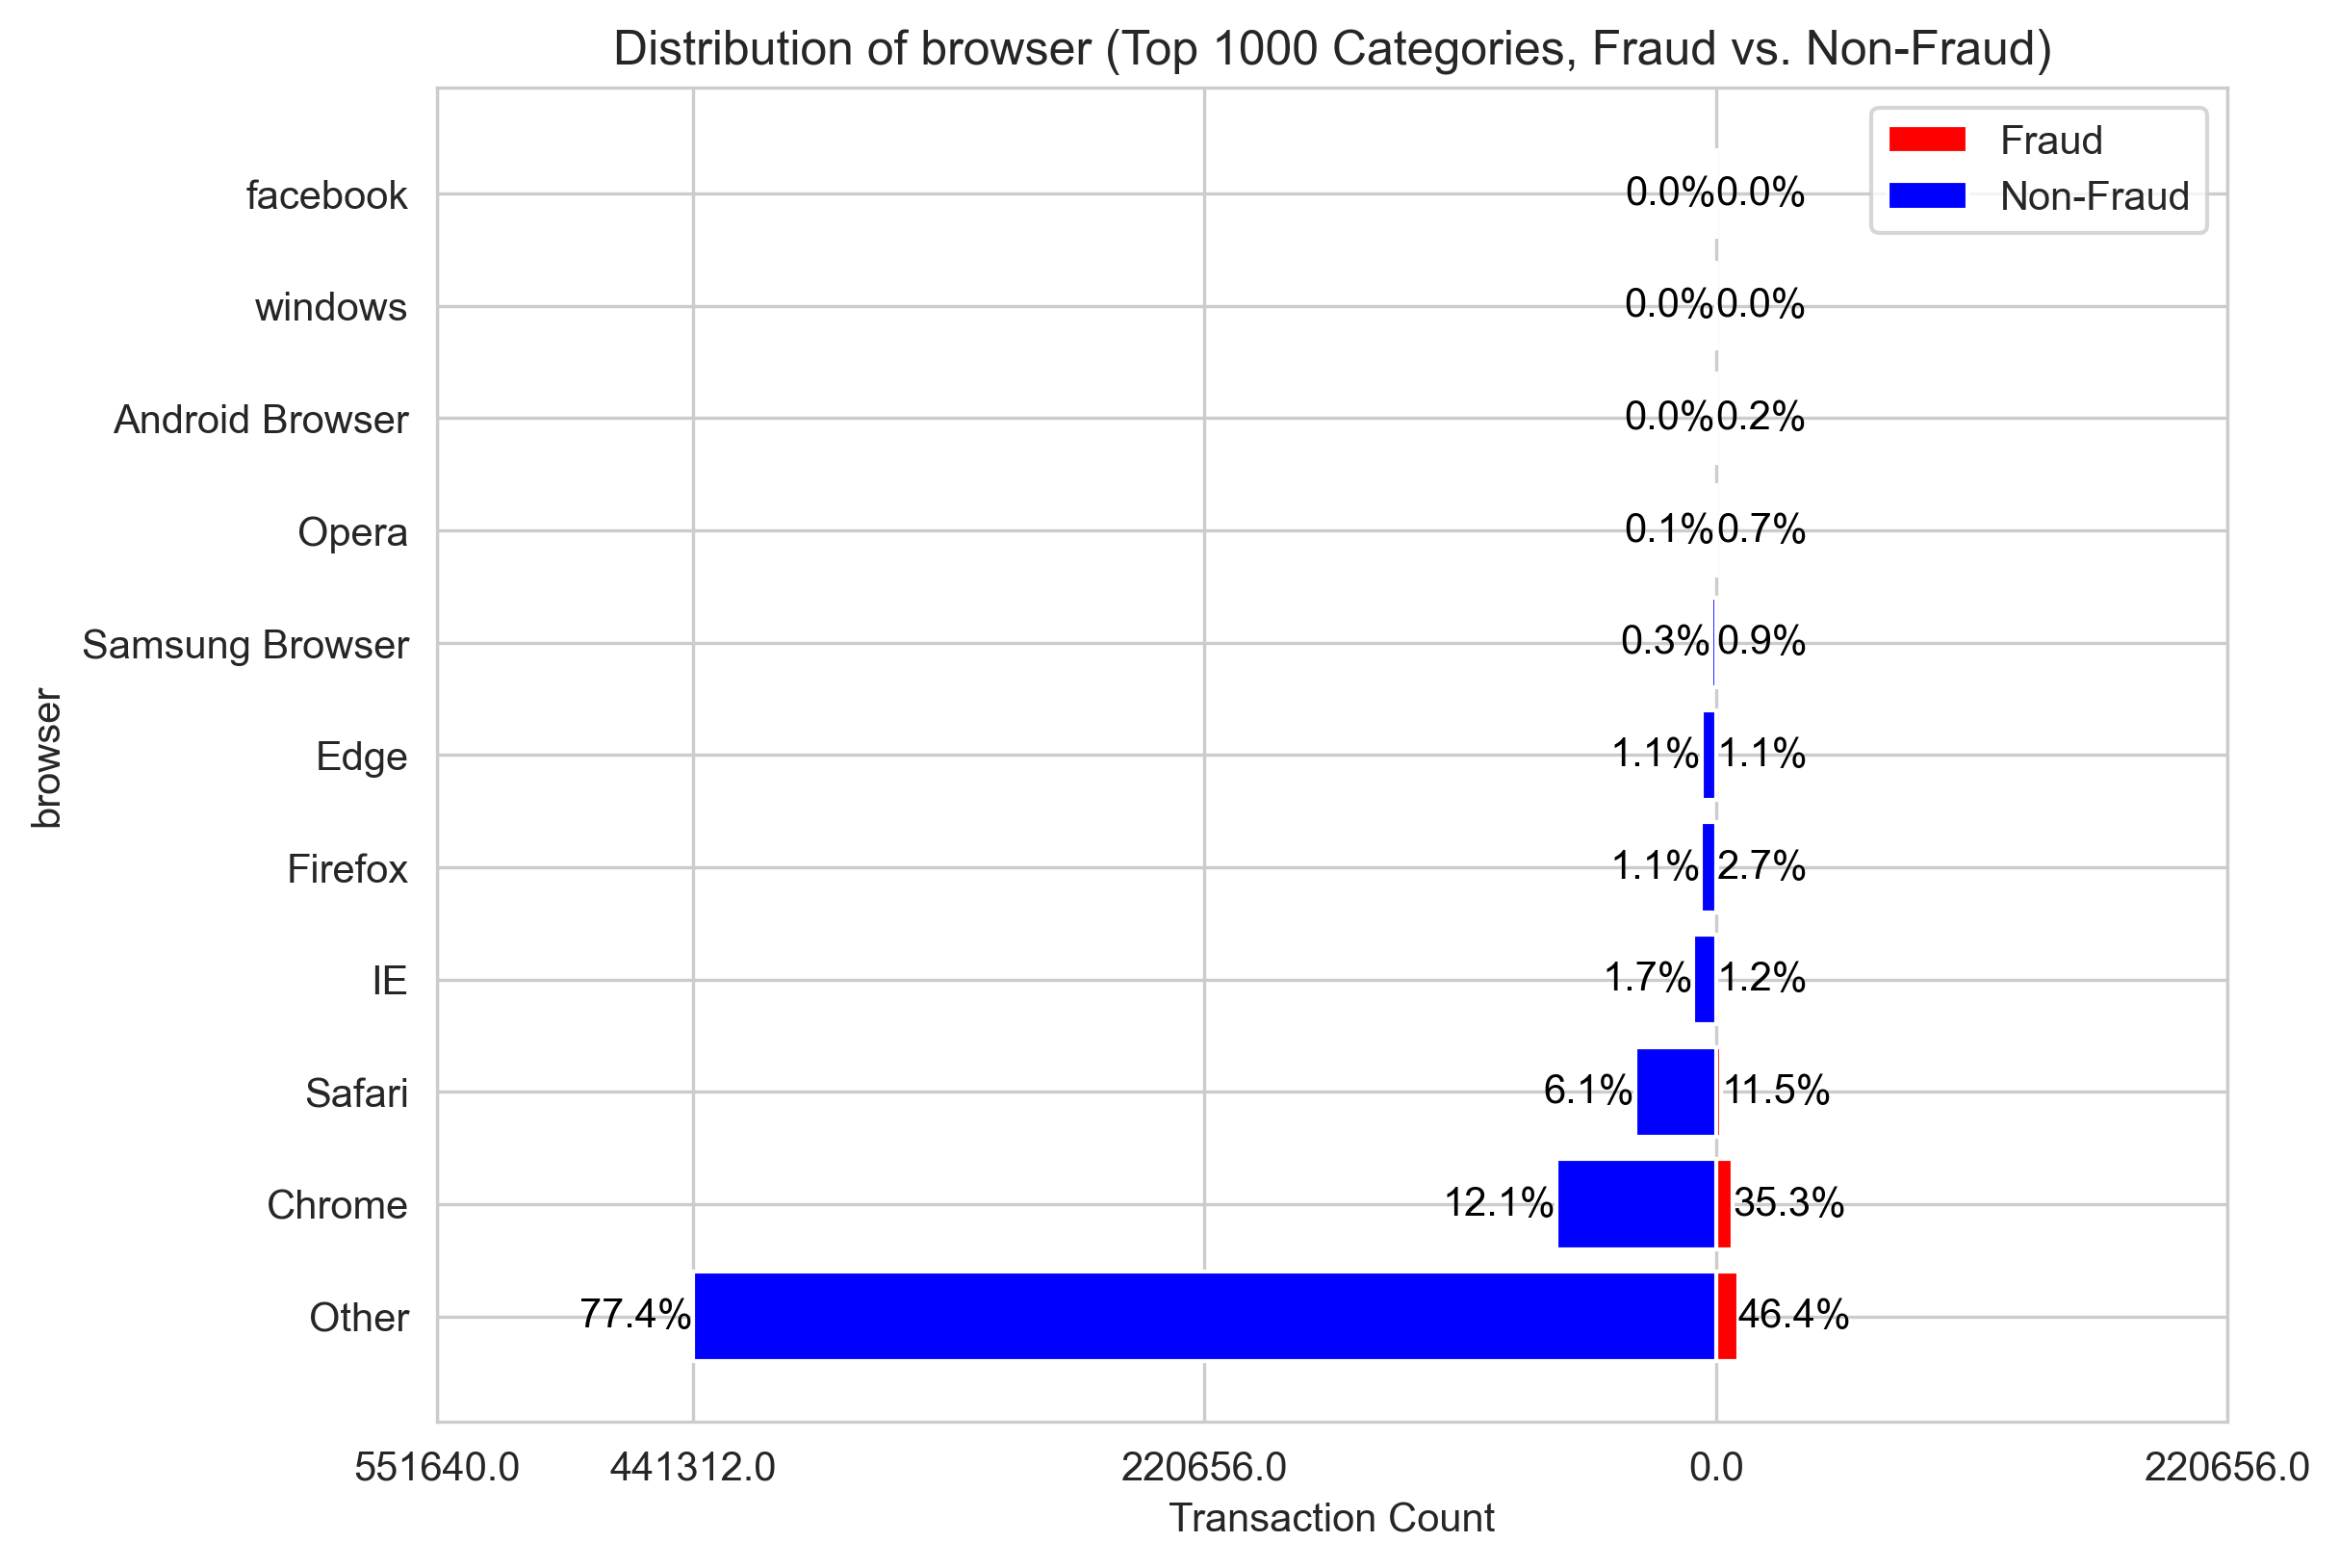

In [4]:
def plot_butterfly_histogram_categorical(column_name, df=train_df, top_n=None):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

    # Drop NaNs and separate data into fraud and non-fraud
    df = df.dropna(subset=[column_name])
    fraud_data = df[df['isFraud'] == 1][column_name]
    non_fraud_data = df[df['isFraud'] == 0][column_name]

    # Check if there is data in both fraud and non-fraud subsets
    if fraud_data.empty or non_fraud_data.empty:
        print(f"No data available for plotting in column '{column_name}' for one or both categories.")
        return

    # Count occurrences of each category in fraud and non-fraud data
    fraud_counts = fraud_data.value_counts()
    non_fraud_counts = non_fraud_data.value_counts()

    # Combine fraud and non-fraud counts to determine top categories
    total_counts = fraud_counts.add(non_fraud_counts, fill_value=0)
    
    # Select top N categories if specified
    if top_n:
        top_categories = total_counts.nlargest(top_n).index
        fraud_counts = fraud_counts.reindex(top_categories, fill_value=0)
        non_fraud_counts = non_fraud_counts.reindex(top_categories, fill_value=0)
    else:
        top_categories = total_counts.index

    # Calculate total counts for percentage
    total_fraud = fraud_counts.sum()
    total_non_fraud = non_fraud_counts.sum()

    # Plot bars: Fraud data on the right, Non-Fraud on the left
    y_positions = range(len(top_categories))
    ax.barh(y_positions, fraud_counts, color='red', label='Fraud')
    ax.barh(y_positions, -non_fraud_counts, color='blue', label='Non-Fraud')

    # Add percentage labels on both sides
    for i, category in enumerate(top_categories):
        # Calculate percentage
        fraud_percentage = (fraud_counts[category] / total_fraud) * 100 if total_fraud > 0 else 0
        non_fraud_percentage = (non_fraud_counts[category] / total_non_fraud) * 100 if total_non_fraud > 0 else 0
        
        # Right side for fraud
        ax.text(fraud_counts[category] + 1, i, f'{fraud_percentage:.1f}%', va='center', ha='left', color='black')
        # Left side for non-fraud
        ax.text(-non_fraud_counts[category] - 1, i, f'{non_fraud_percentage:.1f}%', va='center', ha='right', color='black')

    # Labeling
    ax.set_yticks(y_positions)
    ax.set_yticklabels(top_categories)
    ax.set_xlabel("Transaction Count")
    ax.set_ylabel(column_name)
    ax.set_title(f"Distribution of {column_name} (Top {top_n} Categories, Fraud vs. Non-Fraud)")

    # Set x-ticks to display positive values for both sides
    max_count = max(fraud_counts.max(), non_fraud_counts.max())
    ax.set_xticks([-max_count*1.25, -max_count, -max_count // 2, 0, max_count // 2])
    ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()])

    # Add a legend
    ax.legend(loc='upper right')

    plt.show()
    return top_categories

# Example usage: Plotting top 5 categories
top_categories = plot_butterfly_histogram_categorical('browser', top_n=1000)


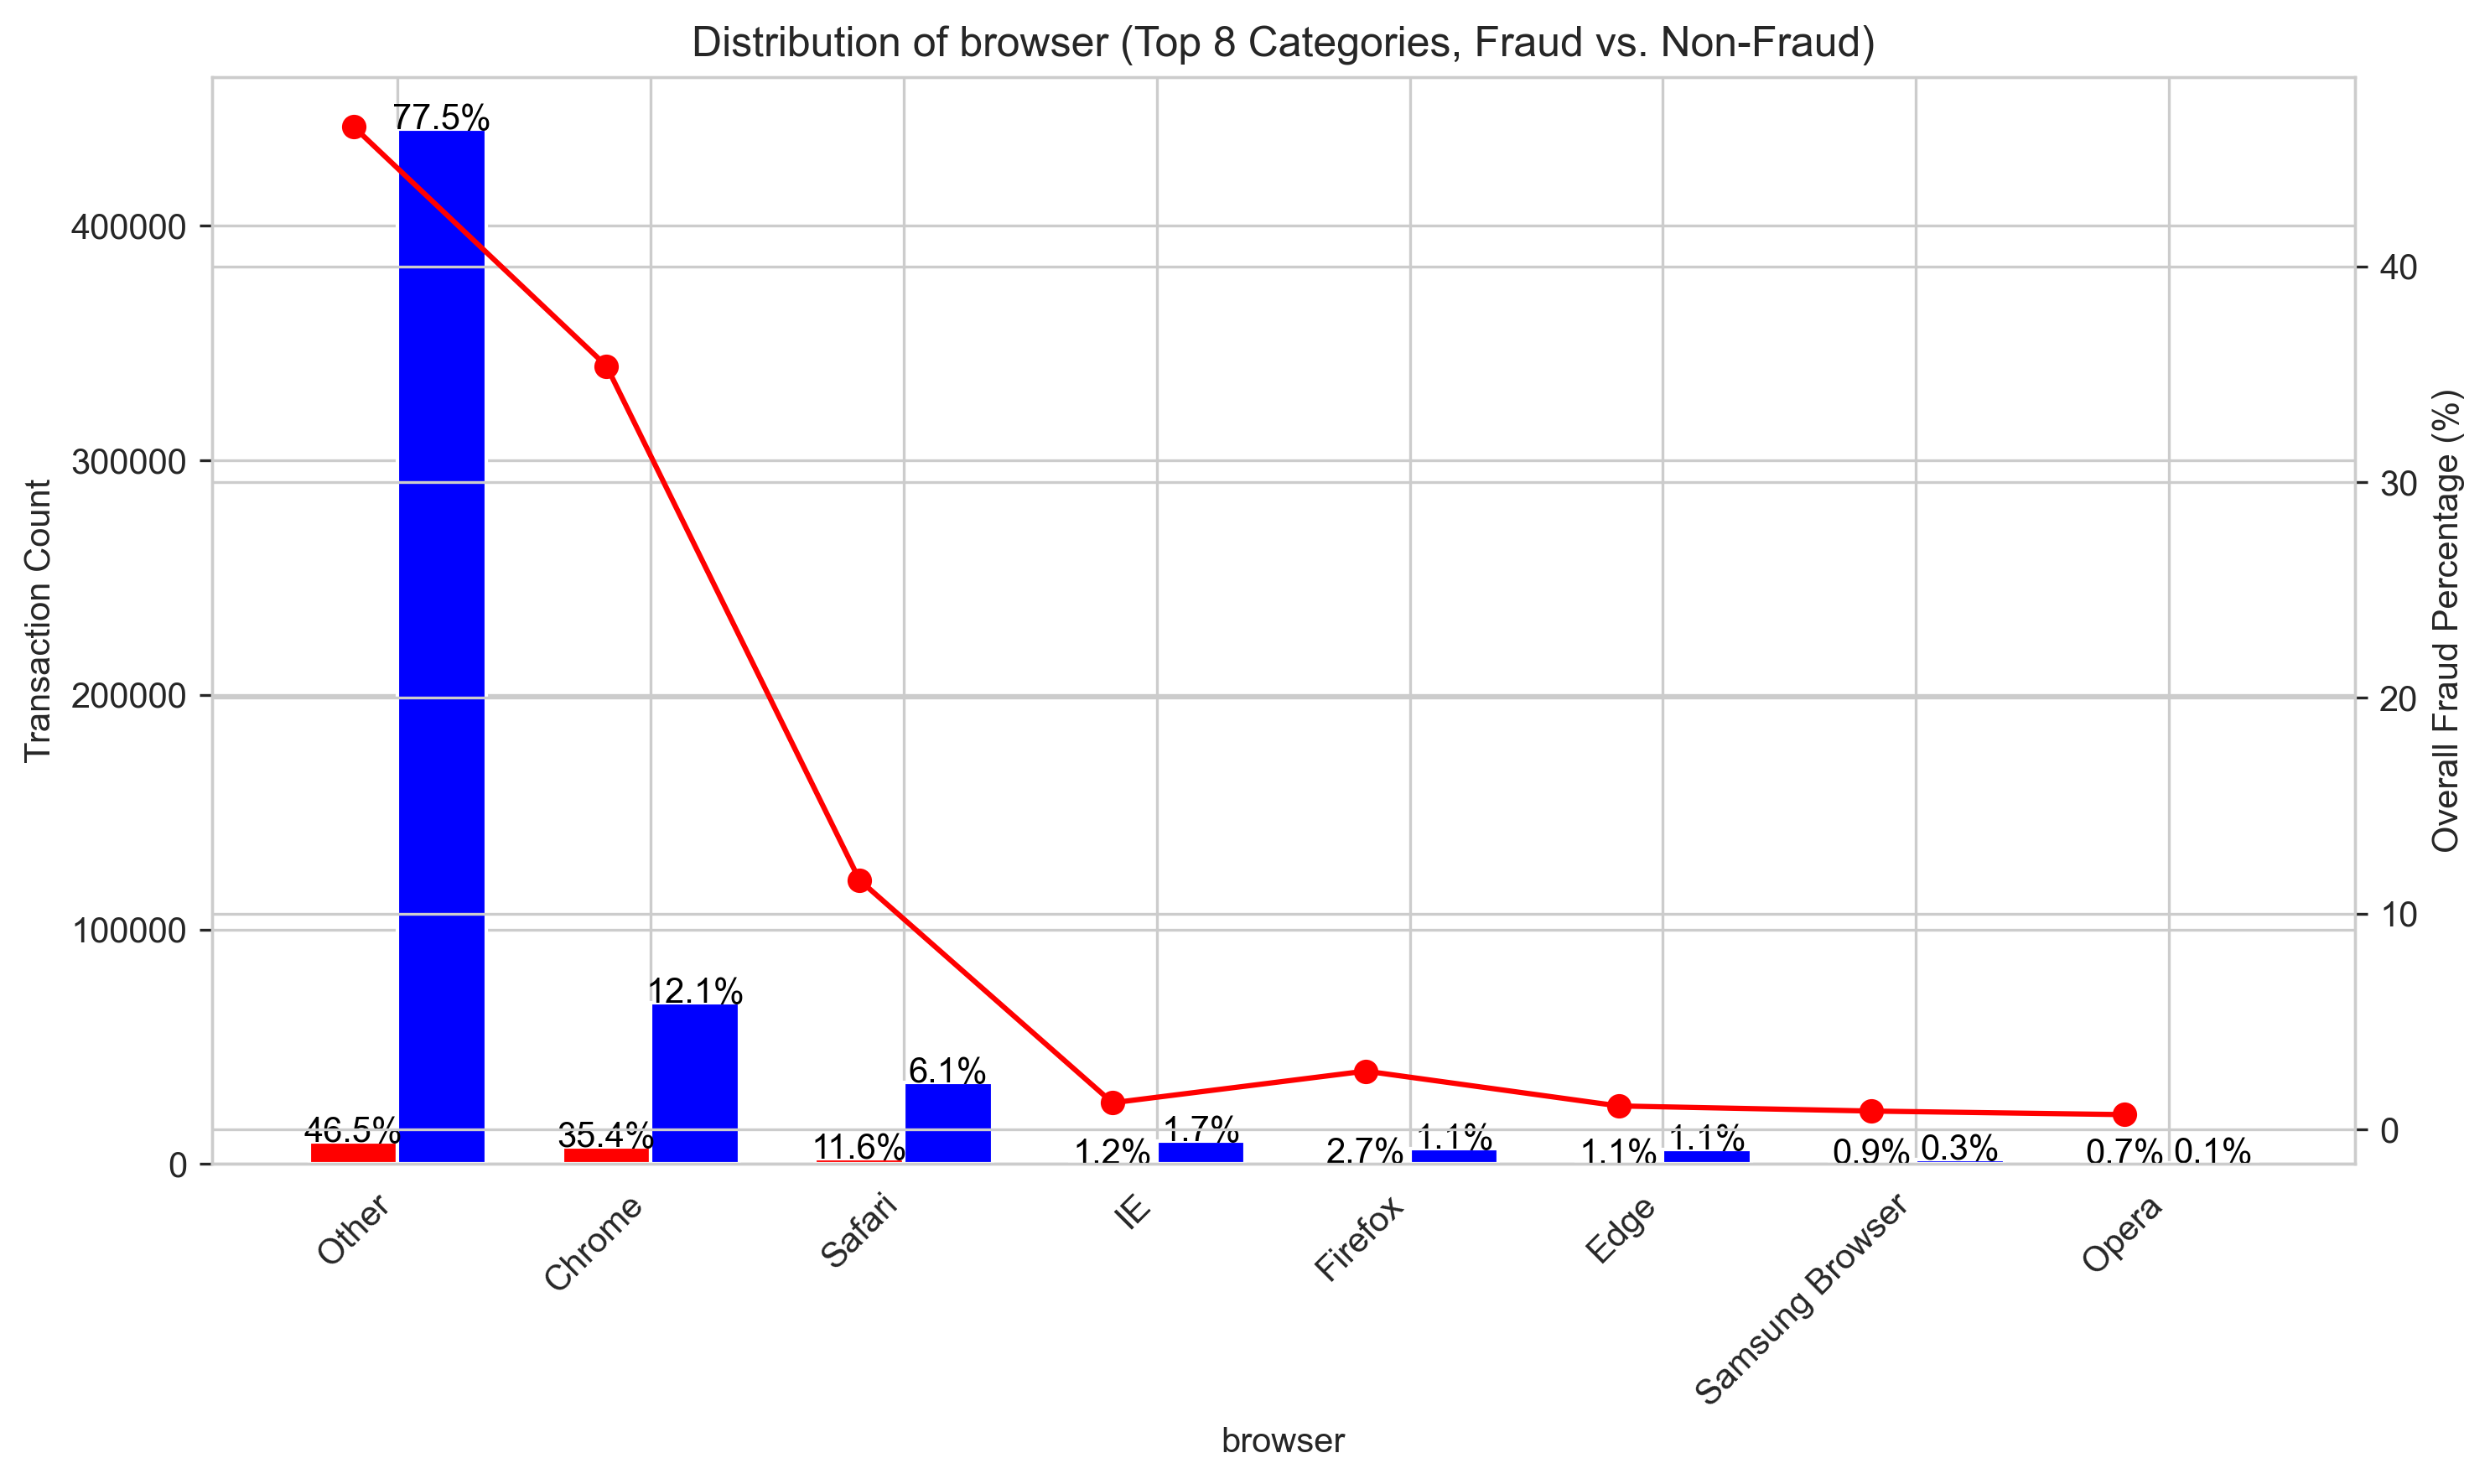

In [5]:
def plot_bar_chart_with_overall_fraud_percentage(column_name, df=train_df, top_n=None):
    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

    # Drop NaNs and separate data into fraud and non-fraud
    df = df.dropna(subset=[column_name])
    fraud_data = df[df['isFraud'] == 1][column_name]
    non_fraud_data = df[df['isFraud'] == 0][column_name]

    # Check if there is data in both fraud and non-fraud subsets
    if fraud_data.empty or non_fraud_data.empty:
        print(f"No data available for plotting in column '{column_name}' for one or both categories.")
        return

    # Count occurrences of each category in fraud and non-fraud data
    fraud_counts = fraud_data.value_counts()
    non_fraud_counts = non_fraud_data.value_counts()

    # Combine fraud and non-fraud counts to determine top categories
    total_counts = fraud_counts.add(non_fraud_counts, fill_value=0)
    
    # Select top N categories if specified
    if top_n:
        top_categories = total_counts.nlargest(top_n).index
        fraud_counts = fraud_counts.reindex(top_categories, fill_value=0)
        non_fraud_counts = non_fraud_counts.reindex(top_categories, fill_value=0)
    else:
        top_categories = total_counts.index

    # Calculate total fraud and non-fraud counts for overall percentage calculation
    total_fraud_count = fraud_counts.sum()
    total_non_fraud_count = non_fraud_counts.sum()

    # Calculate overall fraud and non-fraud percentages for each category
    fraud_percentages = (fraud_counts / total_fraud_count) * 100
    non_fraud_percentages = (non_fraud_counts / total_non_fraud_count) * 100

    # Plotting fraud and non-fraud counts with side-by-side bars
    bar_width = 0.35
    index = range(len(top_categories))

    ax1.bar(index, fraud_counts, bar_width, color='red', label='Fraud')
    ax1.bar([i + bar_width for i in index], non_fraud_counts, bar_width, color='blue', label='Non-Fraud')

    # Add primary Y-axis labels and title
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Transaction Count')
    ax1.set_title(f"Distribution of {column_name} (Top {top_n} Categories, Fraud vs. Non-Fraud)")

    # Add fraud percentage on secondary Y-axis
    ax2 = ax1.twinx()
    ax2.plot(index, fraud_percentages, color='red', marker='o', linestyle='-', label='Overall Fraud Percentage (%)')
    ax2.set_ylabel('Overall Fraud Percentage (%)')

    # Set x-axis ticks and labels
    ax1.set_xticks([i + bar_width / 2 for i in index])
    ax1.set_xticklabels(top_categories, rotation=45, ha='right')

    # Add overall percentage labels on the bars
    for i, category in enumerate(top_categories):
        # Add overall percentage for fraud
        ax1.text(i, fraud_counts[category] + 0.5, f'{fraud_percentages[category]:.1f}%', ha='center', color='black')
        # Add overall percentage for non-fraud
        ax1.text(i + bar_width, non_fraud_counts[category] + 0.5, f'{non_fraud_percentages[category]:.1f}%', ha='center', color='black')

    # Add legends
    # ax1.legend(loc='upper right')
    # ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Example usage: Plotting top 5 categories
plot_bar_chart_with_overall_fraud_percentage('browser', top_n=8)


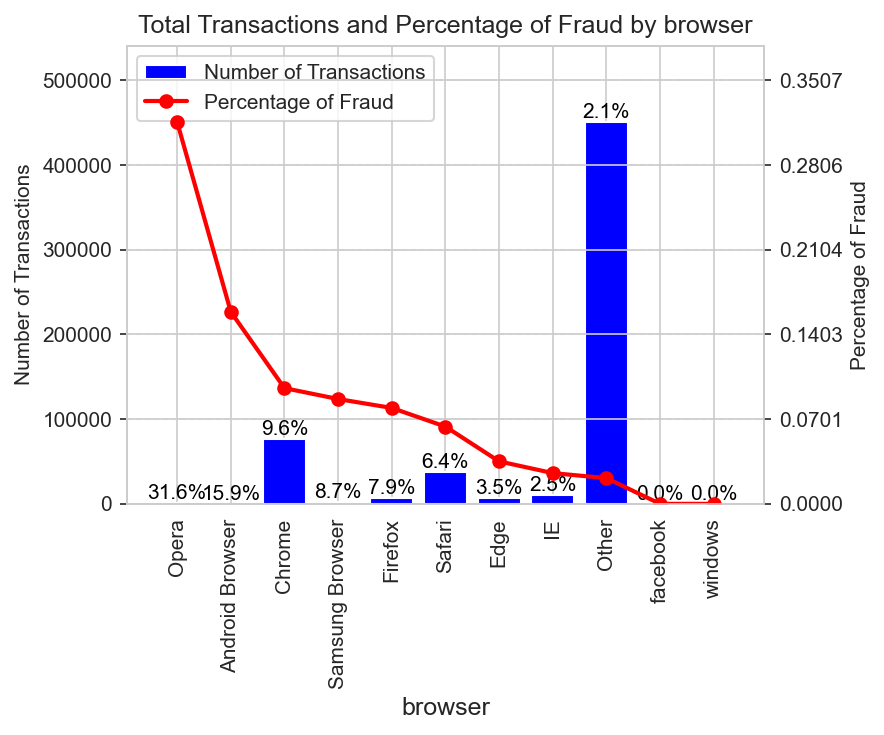

In [6]:
import matplotlib.pyplot as plt

def plot_key_and_fraud_distribution(df, key, width=8):
    # Group data by the key and 'isFraud' columns and count occurrences
    fraud_counts = df.groupby([key, 'isFraud']).size().unstack(fill_value=0)

    # Ensure both columns ('No Fraud' and 'Fraud') exist
    if fraud_counts.shape[1] == 1:
        fraud_counts[1 - fraud_counts.columns[0]] = 0

    # Reorder the columns and rename them
    fraud_counts = fraud_counts[[0, 1]]
    fraud_counts.columns = ['No Fraud', 'Fraud']

    # Calculate total counts and fraud proportions
    total_counts = fraud_counts.sum(axis=1)
    fraud_proportions = fraud_counts['Fraud'] / total_counts

    # Sort by fraud proportion in descending order
    sorted_indices = fraud_proportions.sort_values(ascending=False).index
    fraud_counts = fraud_counts.loc[sorted_indices]
    total_counts = total_counts.loc[sorted_indices]
    fraud_proportions = fraud_proportions.loc[sorted_indices]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(width, 5), dpi=150)
    bar_width = 0.8
    x_positions = range(len(total_counts))

    # Plot total counts as bars
    ax1.bar(x_positions, total_counts, width=bar_width, color='blue', label='Number of Transactions', align='center')
    ax1.set_ylabel('Number of Transactions')
    ax1.set_xlabel(key, fontsize=12)
    ax1.set_title(f'Total Transactions and Percentage of Fraud by {key}', fontsize=12)

    # Create a second y-axis for fraud proportions
    ax2 = ax1.twinx()
    ax2.plot(x_positions, fraud_proportions, color='red', marker='o', label='Percentage of Fraud', linewidth=2)
    ax2.set_ylabel('Percentage of Fraud')

    # Synchronize y-ticks between ax1 and ax2
    ax1_ticks = ax1.get_yticks()
    ax2.set_yticks(ax1_ticks / total_counts.max() * fraud_proportions.max())

    # Set aligned y-limits
    max_count = total_counts.max()
    ax1.set_ylim(0, max_count * 1.2)
    ax2.set_ylim(0, fraud_proportions.max() * 1.2)

    # Add overall percentage annotations for fraud counts
    for i, (count, proportion) in enumerate(zip(total_counts, fraud_proportions)):
        fraud_percentage = proportion * 100
        ax1.text(i, count + 0.5, f'{fraud_percentage:.1f}%', ha='center', va='bottom', color='black')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    # Set x-ticks to match the categories
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(fraud_counts.index, rotation=90)

    # Add grid to the primary axis
    ax1.grid(True, which='both', axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Example usage
plot_key_and_fraud_distribution(train_df, 'browser', width=6)


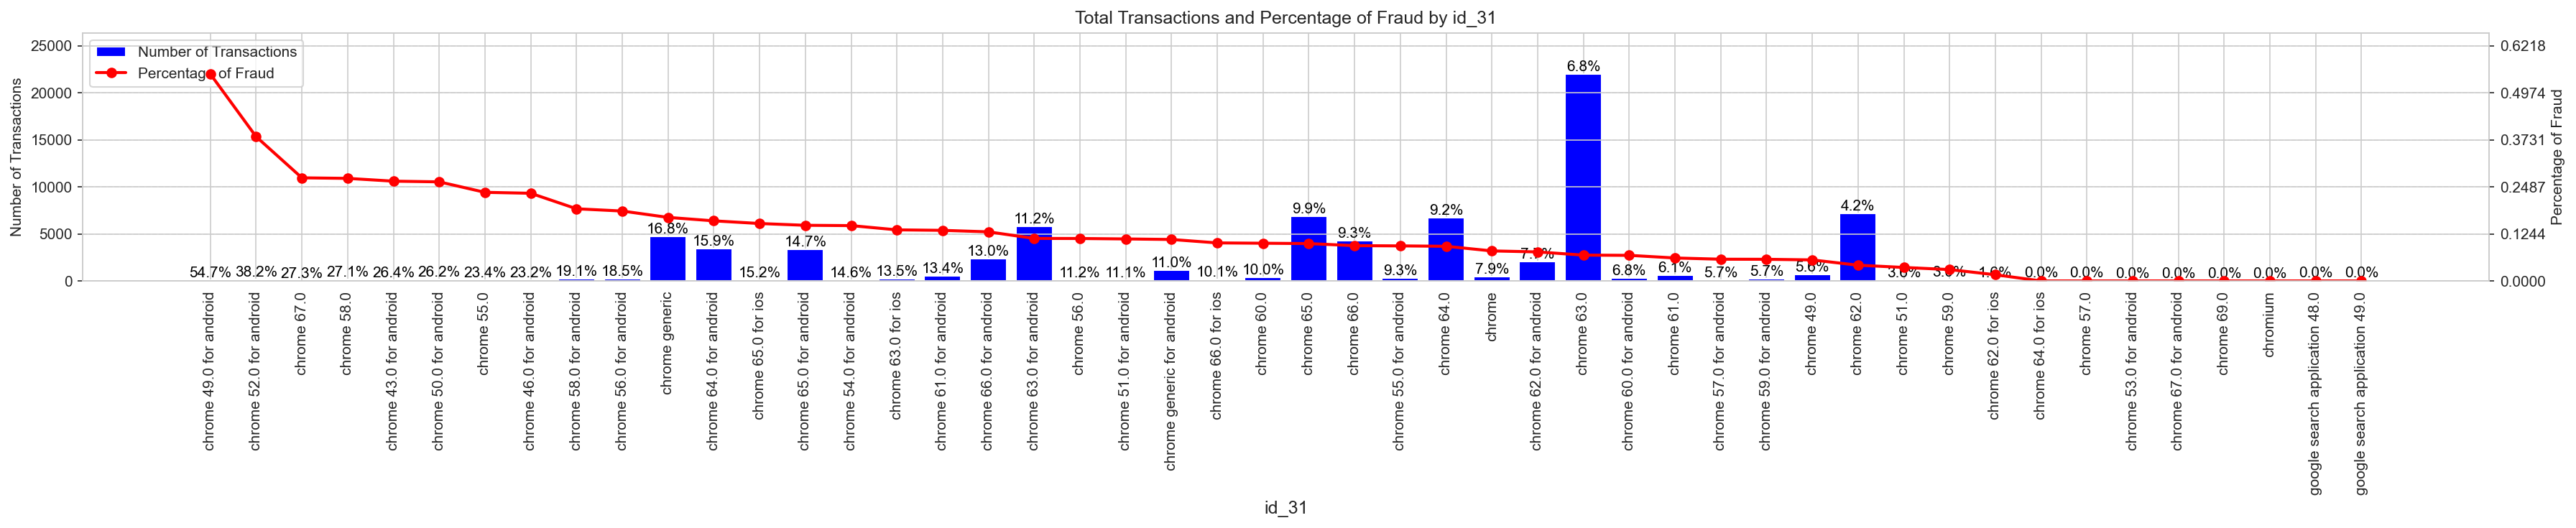

In [7]:

plot_key_and_fraud_distribution(train_df[train_df['browser'] == 'Chrome'], 'id_31', width=24)


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_80778/1509269657.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrome_df['chrome_versions'] = chrome_df['id_31'].apply(categorize_chrome_version)


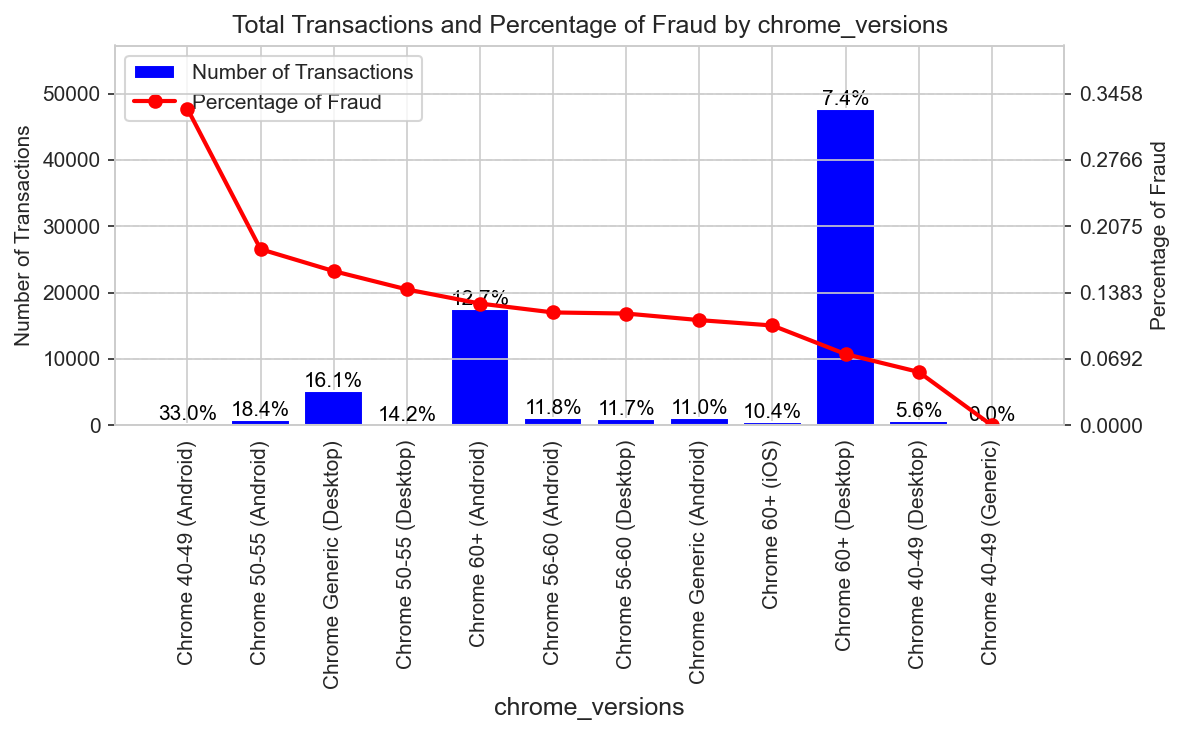

In [8]:
import pandas as pd
import re

chrome_version_map = {
    'chrome 63.0': 'Chrome 60+ (Desktop)',
    'chrome 62.0': 'Chrome 60+ (Desktop)',
    'chrome 65.0': 'Chrome 60+ (Desktop)',
    'chrome 64.0': 'Chrome 60+ (Desktop)',
    'chrome 63.0 for android': 'Chrome 60+ (Android)',
    'chrome generic': 'Chrome Generic (Desktop)',
    'chrome 66.0': 'Chrome 60+ (Desktop)',
    'chrome 64.0 for android': 'Chrome 60+ (Android)',
    'chrome 65.0 for android': 'Chrome 60+ (Android)',
    'chrome 66.0 for android': 'Chrome 60+ (Android)',
    'chrome 62.0 for android': 'Chrome 60+ (Android)',
    'chrome generic for android': 'Chrome Generic (Android)',
    'chrome 49.0': 'Chrome 40-49 (Desktop)',
    'chrome 61.0': 'Chrome 60+ (Desktop)',
    'chrome 61.0 for android': 'Chrome 60+ (Android)',
    'chrome': 'Chrome Generic (Desktop)',
    'chrome 60.0': 'Chrome 56-60 (Desktop)',
    'chrome 60.0 for android': 'Chrome 56-60 (Android)',
    'chrome 55.0 for android': 'Chrome 50-55 (Android)',
    'chrome 58.0 for android': 'Chrome 56-60 (Android)',
    'chrome 56.0 for android': 'Chrome 56-60 (Android)',
    'chrome 59.0 for android': 'Chrome 56-60 (Android)',
    'chrome 63.0 for ios': 'Chrome 60+ (iOS)',
    'chrome 58.0': 'Chrome 56-60 (Desktop)',
    'chrome 66.0 for ios': 'Chrome 60+ (iOS)',
    'chrome 52.0 for android': 'Chrome 50-55 (Android)',
    'chrome 50.0 for android': 'Chrome 50-55 (Android)',
    'chrome 59.0': 'Chrome 56-60 (Desktop)',
    'chrome 56.0': 'Chrome 56-60 (Desktop)',
    'chrome 57.0': 'Chrome 56-60 (Desktop)',
    'chrome 57.0 for android': 'Chrome 56-60 (Android)',
    'chrome 54.0 for android': 'Chrome 50-55 (Android)',
    'chrome 65.0 for ios': 'Chrome 60+ (iOS)',
    'chrome 43.0 for android': 'Chrome 40-49 (Android)',
    'chrome 46.0 for android': 'Chrome 40-49 (Android)',
    'chrome 55.0': 'Chrome 50-55 (Desktop)',
    'chrome 62.0 for ios': 'Chrome 60+ (iOS)',
    'chrome 51.0': 'Chrome 50-55 (Desktop)',
    'google search application 48.0': 'Chrome 40-49 (Generic)',
    'google search application 49.0': 'Chrome 40-49 (Generic)',
    'chrome 49.0 for android': 'Chrome 40-49 (Android)',
    'chrome 64.0 for ios': 'Chrome 60+ (iOS)',
    'chrome 51.0 for android': 'Chrome 50-55 (Android)',
    'chrome 53.0 for android': 'Chrome 50-55 (Android)',
    'chrome 67.0': 'Chrome 60+ (Desktop)',
    'chromium': 'Chrome Generic (Desktop)',
    'chrome 69.0': 'Chrome 60+ (Desktop)',
    'chrome 67.0 for android': 'Chrome 60+ (Android)',
    'other': 'Other'
}



# Function to categorize Chrome versions by range and platform
def categorize_chrome_version(browser):
    return chrome_version_map.get(browser.lower(), 'Other')    

# Apply the categorization function to create a grouped column
chrome_df = train_df[train_df['browser'] == 'Chrome']
chrome_df['chrome_versions'] = chrome_df['id_31'].apply(categorize_chrome_version)

plot_key_and_fraud_distribution(chrome_df, 'chrome_versions', width=8)


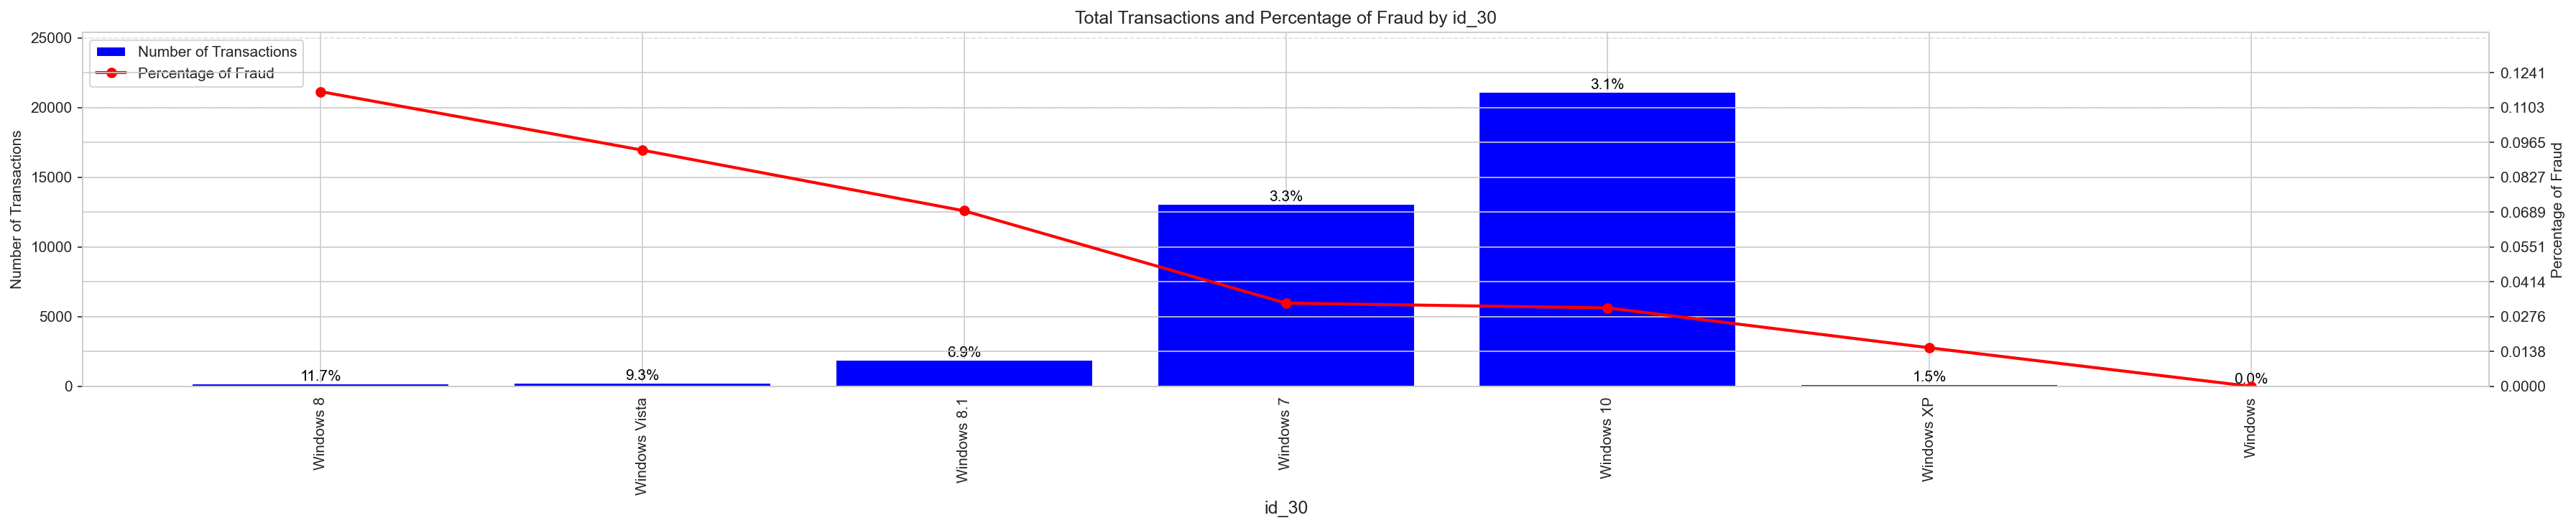

In [9]:
plot_key_and_fraud_distribution(train_df[train_df['id_30'].str.contains('Windows', case=False, na=False)], 'id_30', width=24)


In [10]:
train_df['id_30'].value_counts().keys()

Index(['Windows 10', 'Windows 7', 'iOS 11.2.1', 'iOS 11.1.2', 'Android 7.0',
       'Mac OS X 10_12_6', 'Mac OS X 10_11_6', 'iOS 11.3.0', 'Windows 8.1',
       'Mac OS X 10_10_5', 'iOS 11.2.6', 'iOS 10.3.3', 'Mac OS X 10_13_2',
       'Mac OS X 10_13_1', 'iOS 11.2.5', 'Linux', 'Android', 'iOS 11.2.2',
       'Mac OS X 10_13_3', 'iOS 11.2.0', 'Mac OS X 10_13_4', 'iOS 11.1.1',
       'iOS 11.0.3', 'Android 7.1.1', 'Mac OS X 10_9_5', 'Android 6.0.1',
       'iOS 10.3.2', 'iOS 9.3.5', 'Android 5.1.1', 'Android 8.0.0', 'Mac',
       'Mac OS X 10.13', 'iOS 10.2.1', 'iOS', 'iOS 11.1.0', 'Windows Vista',
       'iOS 10.3.1', 'Mac OS X 10.12', 'Mac OS X 10_12_5', 'Mac OS X 10.11',
       'Android 8.1.0', 'Windows 8', 'iOS 11.0.2', 'iOS 10.2.0', 'iOS 11.0.0',
       'iOS 11.3.1', 'Mac OS X 10.10', 'Windows XP', 'iOS 11.0.1',
       'Mac OS X 10_12_4', 'iOS 10.1.1', 'Mac OS X 10_12_3', 'iOS 10.0.2',
       'Mac OS X 10_7_5', 'Mac OS X 10_11_5', 'Android 6.0', 'Mac OS X 10_8_5',
       'Android 4.

/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_80778/3145526552.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mac_version_df['mac_versions'] = mac_version_df['id_30'].apply(categorize_mac_version)


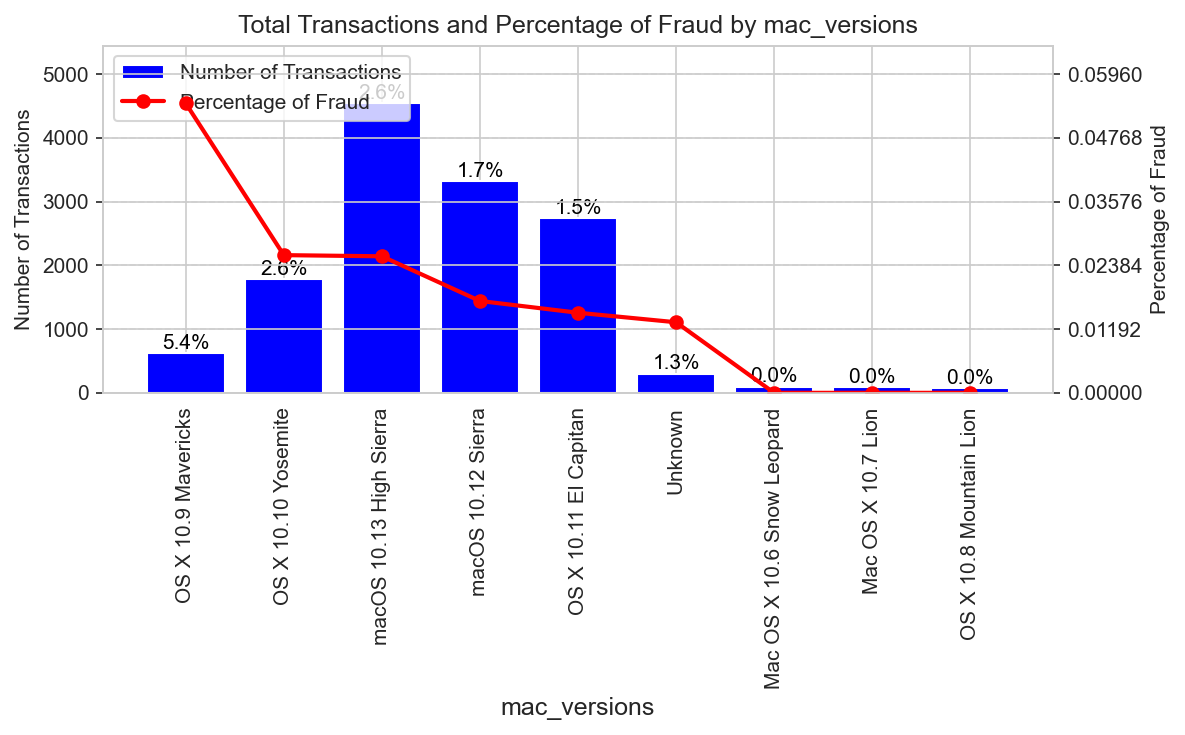

In [11]:
# plot_key_and_fraud_distribution(train_df[train_df['id_30'].str.contains('Mac', case=False, na=False)], 'id_30', width=24)



mac_version_mapping = {
    'Mac OS X 10_7_5': 'Mac OS X 10.7 Lion',
    'Mac OS X 10_12_4': 'macOS 10.12 Sierra',
    'Mac OS X 10_12_5': 'macOS 10.12 Sierra',
    'Mac': 'Unknown',  # No specific mapping available
    'Mac OS X 10_6_8': 'Mac OS X 10.6 Snow Leopard',
    'Mac OS X 10_12_6': 'macOS 10.12 Sierra',
    'Mac OS X 10.13': 'macOS 10.13 High Sierra',
    'Mac OS X 10_11_4': 'OS X 10.11 El Capitan',
    'Mac OS X 10_13_2': 'macOS 10.13 High Sierra',
    'Mac OS X 10_12_3': 'macOS 10.12 Sierra',
    'Mac OS X 10_13_4': 'macOS 10.13 High Sierra',
    'Mac OS X 10_9_5': 'OS X 10.9 Mavericks',
    'Mac OS X 10.6': 'Mac OS X 10.6 Snow Leopard',
    'Mac OS X 10_12': 'macOS 10.12 Sierra',
    'Mac OS X 10_13_3': 'macOS 10.13 High Sierra',
    'Mac OS X 10.9': 'OS X 10.9 Mavericks',
    'Mac OS X 10_13_1': 'macOS 10.13 High Sierra',
    'Mac OS X 10_12_1': 'macOS 10.12 Sierra',
    'Mac OS X 10_11_6': 'OS X 10.11 El Capitan',
    'Mac OS X 10.10': 'OS X 10.10 Yosemite',
    'Mac OS X 10.12': 'macOS 10.12 Sierra',
    'Mac OS X 10_11_3': 'OS X 10.11 El Capitan',
    'Mac OS X 10_11_5': 'OS X 10.11 El Capitan',
    'Mac OS X 10_13_5': 'macOS 10.13 High Sierra',
    'Mac OS X 10_10_5': 'OS X 10.10 Yosemite',
    'Mac OS X 10_12_2': 'macOS 10.12 Sierra',
    'Mac OS X 10_8_5': 'OS X 10.8 Mountain Lion',
    'Mac OS X 10.11': 'OS X 10.11 El Capitan'
}


# Function to categorize Chrome versions by range and platform
def categorize_mac_version(mac_versions):
    return mac_version_mapping.get(mac_versions, 'Unknown')

# Apply the categorization function to create a grouped column
mac_version_df = train_df[train_df['id_30'].str.contains('Mac', case=False, na=False)]
mac_version_df['mac_versions'] = mac_version_df['id_30'].apply(categorize_mac_version)

plot_key_and_fraud_distribution(mac_version_df, 'mac_versions')
